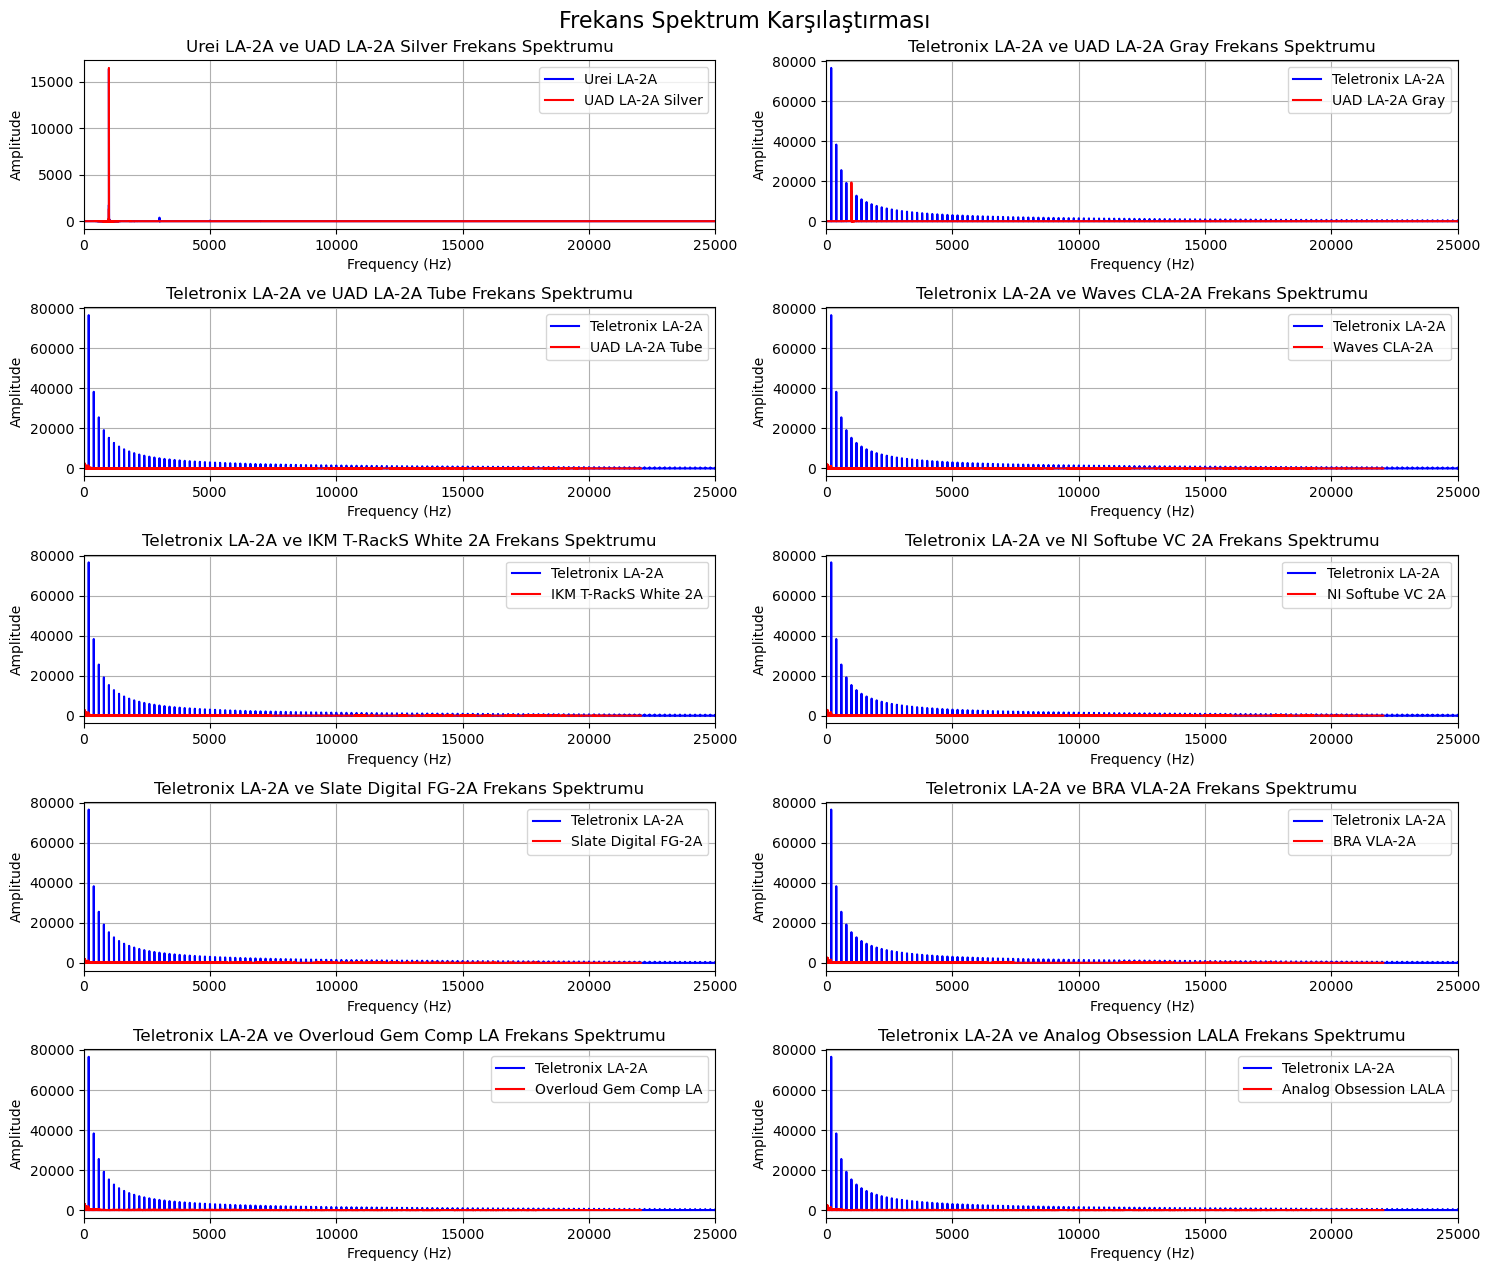

In [30]:
# Her bir grafik, iki ses sinyalinin frekans spektrumu karşılaştırmasını gösterir.

# Önerilen dosya: testere dişi dalga 200 hz

# Librosa sisteminin aktarılması
import matplotlib.pyplot as plt # Grafik ve görselleştirme işlemleri için Matplotlib kütüphanesini yükler.
import numpy as np # Bilimsel hesaplama ve dizi işlemleri için NumPy kütüphanesini yükler.
import librosa # Ses işleme ve analiz için Librosa kütüphanesini yükler.
import librosa.display # Librosa’nın ses grafikleri çizme fonksiyonlarını yükler.
import pyloudnorm as pyln  # LUFS analizini yapar.
import IPython.display as ipd # Ses dosyalarını Jupyter'da çalmak için gerekli IPython fonksiyonlarını yükler.
from IPython.display import Audio, display  # Ses dosyalarını Jupyter hücresinde oynatmaya olanak tanır.
from scipy import signal # Python'daki SciPy kütüphanesinin signal modülünü içe aktarmaya yarar.

# Ses dosyalarının yolları
audio_files = [
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/200.hz.sawtooth.96.32.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1khz sine LA2A Urei_04.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad gray render_01.wav",
    "/Users/nazimerensahin/Desktop/la_2a_processed/PLUGINS/Audio Files/1 khz sine uad silver render_01.wav",
    "/Users/nazimerensahin/Desktop/fldr/tube.wav",
    "/Users/nazimerensahin/Desktop/fldr/cla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/white_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vc_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/fg_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/vla_2a.wav",
    "/Users/nazimerensahin/Desktop/fldr/comp_la.wav",
    "/Users/nazimerensahin/Desktop/fldr/lala.wav",
]

# Ses dosyalarının etiketleri
audio_labels = [
    "Teletronix LA-2A",
    "Urei LA-2A",
    "UAD LA-2A Gray",
    "UAD LA-2A Silver",
    "UAD LA-2A Tube",
    "Waves CLA-2A",
    "IKM T-RackS White 2A",
    "NI Softube VC 2A",
    "Slate Digital FG-2A",
    "BRA VLA-2A",
    "Overloud Gem Comp LA",
    "Analog Obsession LALA",
]

# Fourier Transform ve normalize işlemi
def compute_fft(signal, sr):
    fft = np.fft.fft(signal)
    magnitude = np.abs(fft[:len(fft)//2])  # Pozitif frekanslar
    freqs = np.fft.fftfreq(len(fft), 1 / sr)[:len(fft)//2]
    return freqs, magnitude

# Grafik düzeni ve başlık oluşturma
plt.figure(figsize=(15, 15))

# **1. Grafik**: Urei LA-2A ile UAD LA-2A Silver karşılaştırması
urei_index = 1
silver_index = 3

# Urei LA-2A ses dosyasını yükle
y_urei, sr_urei = librosa.load(audio_files[urei_index], sr=None)
freqs_urei, magnitude_urei = compute_fft(y_urei, sr_urei)

# UAD LA-2A Silver ses dosyasını yükle
y_silver, sr_silver = librosa.load(audio_files[silver_index], sr=None)
freqs_silver, magnitude_silver = compute_fft(y_silver, sr_silver)

# Urei ve Silver spektrum karşılaştırması
plt.subplot(6, 2, 1)
plt.plot(freqs_urei, magnitude_urei, label="Urei LA-2A", color="blue")
plt.plot(freqs_silver, magnitude_silver, label="UAD LA-2A Silver", color="red")
plt.title("Urei LA-2A ve UAD LA-2A Silver Frekans Spektrumu")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.xlim(0, 25000)

# **2. Grafik ve sonrası**: Teletronix LA-2A ile diğer pluginlerin karşılaştırılması
teletronix_index = 0
y_teletronix, sr_teletronix = librosa.load(audio_files[teletronix_index], sr=None)
freqs_teletronix, magnitude_teletronix = compute_fft(y_teletronix, sr_teletronix)

plot_idx = 2  # İlk grafik Urei-Silver karşılaştırması, bu yüzden 2'den başlıyoruz.

for i, (file_path, label) in enumerate(zip(audio_files, audio_labels)):
    if i in {teletronix_index, urei_index, silver_index}:
        continue  # Urei ve Silver ile karşılaştırmalar yapıldı, geç

    # Diğer dosyayı yükle
    y_other, sr_other = librosa.load(file_path, sr=None)
    freqs_other, magnitude_other = compute_fft(y_other, sr_other)

    # Alt grafik çizimi
    plt.subplot(6, 2, plot_idx)
    plt.plot(freqs_teletronix, magnitude_teletronix, label="Teletronix LA-2A", color="blue")
    plt.plot(freqs_other, magnitude_other, label=label, color="red")
    plt.title(f"Teletronix LA-2A ve {label} Frekans Spektrumu")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.xlim(0, 25000)
    plot_idx += 1

# Genel düzenleme ve gösterim
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Frekans Spektrum Karşılaştırması", fontsize=16)
plt.show()